# Project 2: Elvin Yuen

## Scientific Question: How does country development affect all lung cancer rates?

Lung cancer is one of the leading cancers in the world. It occurs in the lungs, and is most common in people who smoke. The HDI (Human Development Index) by the United Nations Development Programme is the standard for measuring human development in countries.

Of the many databases that conduct research on cancer rates globally, GOBOCAN (Global Cancer Observatory, also known as GCO) is a common source used by researchers. 
GLOBOCAN's website (https://gco.iarc.fr/) states that they are an "interactive web-based platform presenting global cancer statistics to inform cancer control and cancer research."

The WCRF (World Cancer Research Fund) at wcrf.org compiles the information into an easy-to-read formatted chart.

## If a country is more developed, then it would have a higher rate of all lung cancers. 

The lung cancer data distribution is plotted. We observe the mean values. We also plot the distribution of the HDI data. A t-test runs to compare the 2 distributions. We will set alpha as 0.05, and if the p-value is less than 0.05, we reject the null hypothesis. If p-value is more than 0.05, the distributions are similar to random sampling. 

I downloaded cancer data from https://gco.iarc.fr/. I specified I wanted lung cancer incidence rates by countries. I downloaded the data as a .csv file. I downloaded HDI data from http://hdr.undp.org/. I clicked on "download data" after specifying I wanted HDI data. It downloaded as a .csv file.

## Loading in Packages

**matplotlib**: data visualization and plotting tool that is an alternative to matlab

**numpy**: mathematical functions in array structure, can carry out useful calculations and is the foundation for data scientists

**pandas**: package built on numpy, produces data structures and numerical tables for analysis, also used for machine learning

**seaborn**: data visualization based on matplotlib, has more themes and customization options than matplotlib

**pylab**: module that is installed along with matplotlib, combination of pylot and numpy that includes many mathematical plotting and array functions

**scipy**: can process high-level functions, manipulates data and visualizes, an extension of numpy that has newer updates

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import scipy.stats as stats
from scipy.stats import ttest_ind

## Performing Bioinformatics Analysis

CSV files are comma-seperated values that are similar to an excel format. This allows data to be organized in a table. Because this data is not a 1d array, we transfer the numbers to a numpy array. We check the variance by dividing the big number over the small number. If the number is more than 4, the variance is not equal, and we say "False". A t-test presents the difference of the mean values of 2 datasets to show relationships. It is typically used for determining whether a process actually has an effect on a population. 

In [105]:
# import data from .csv files
cancer = pd.read_csv('cancer_data.csv',encoding='latin-1')
hdi = pd.read_csv('human-development-index.csv',encoding='latin-1')
print(cancer)
print(hdi)

# separate into numpy arrays
group1 = np.array([42116, 6312, 16083, 2281658, 457960, 274364])
group2 = np.array([0.590, 0.388, 0.535, 0.924, 0.922, 0.926])

#find variance for each group
print(np.var(group1), np.var(group2))

#perform two sample t-test with non-equal variances
stats.ttest_ind(a=group1, b=group2, equal_var=False)

          Country   Number
0           Kenya    42116
1     South Sudan     6312
2        Zimbabwe    16083
3   United States  2281658
4  United Kingdom   457960
5          Canada   274364
           Entity Code  Year  Human Development Index (UNDP)
0           Kenya  KEN  2017                           0.590
1     South Sudan  SSD  2017                           0.388
2        Zimbabwe  ZWE  2017                           0.535
3   United States  USA  2017                           0.924
4  United Kingdom  GBR  2017                           0.922
5          Canada  CAN  2017                           0.926
652253099706.8055 0.04766680555555556


Ttest_indResult(statistic=1.4205719723316086, pvalue=0.21468474308891872)

## Create histogram plots of the distribution of values 

Here we use matplotlib to set the parameters and plot the distributions. Pyplot from matplotlib allows us to create these figures. We are able to customize the colors of the lines to blue and orange. We also were able to make the lines dashed.

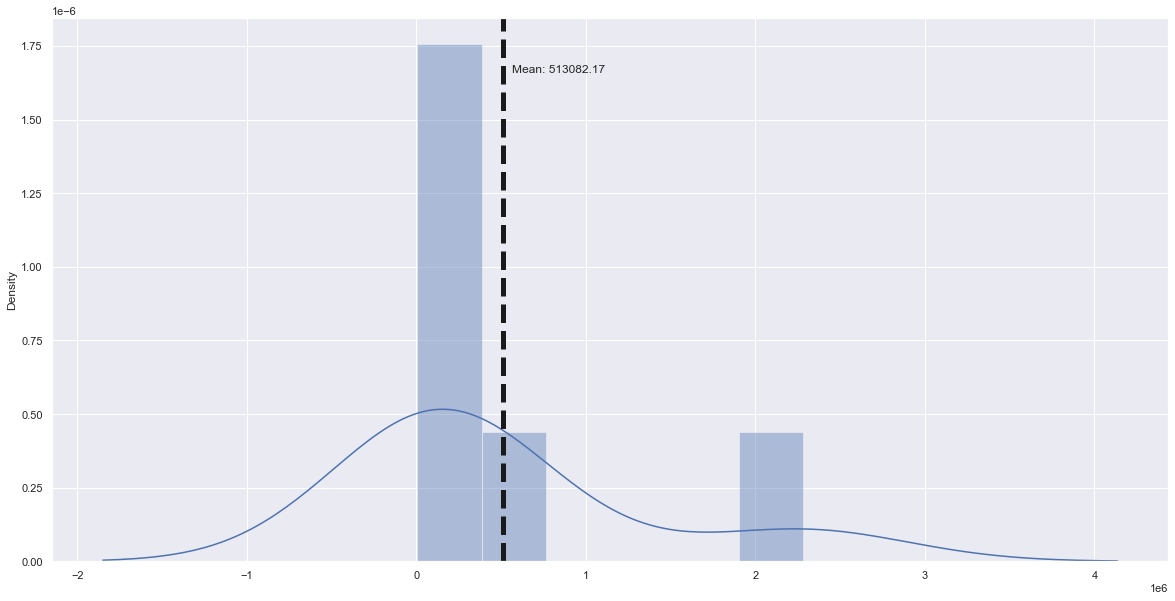

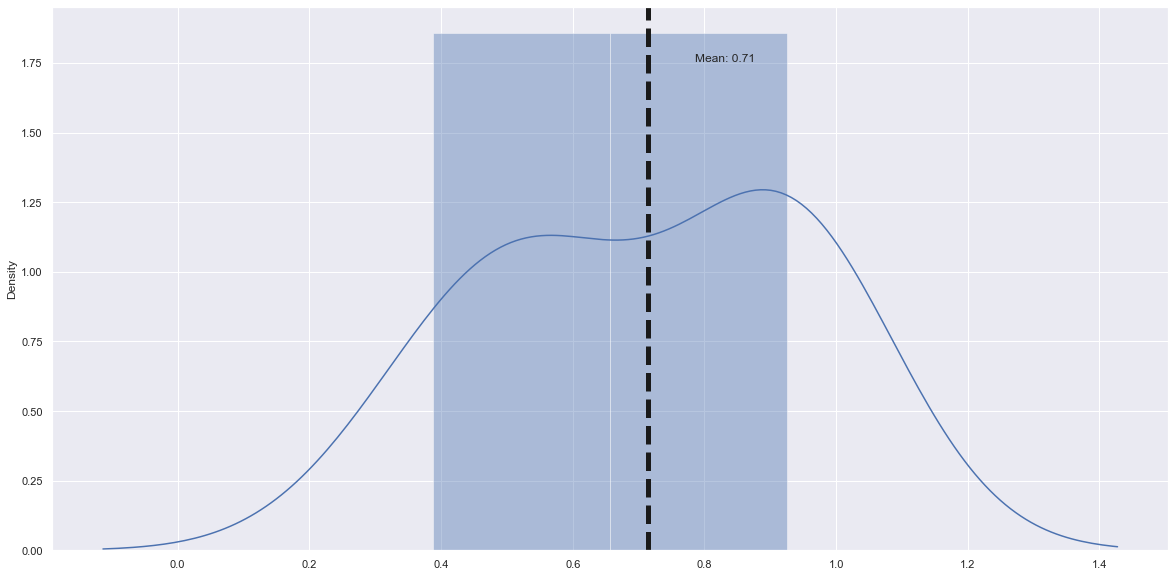

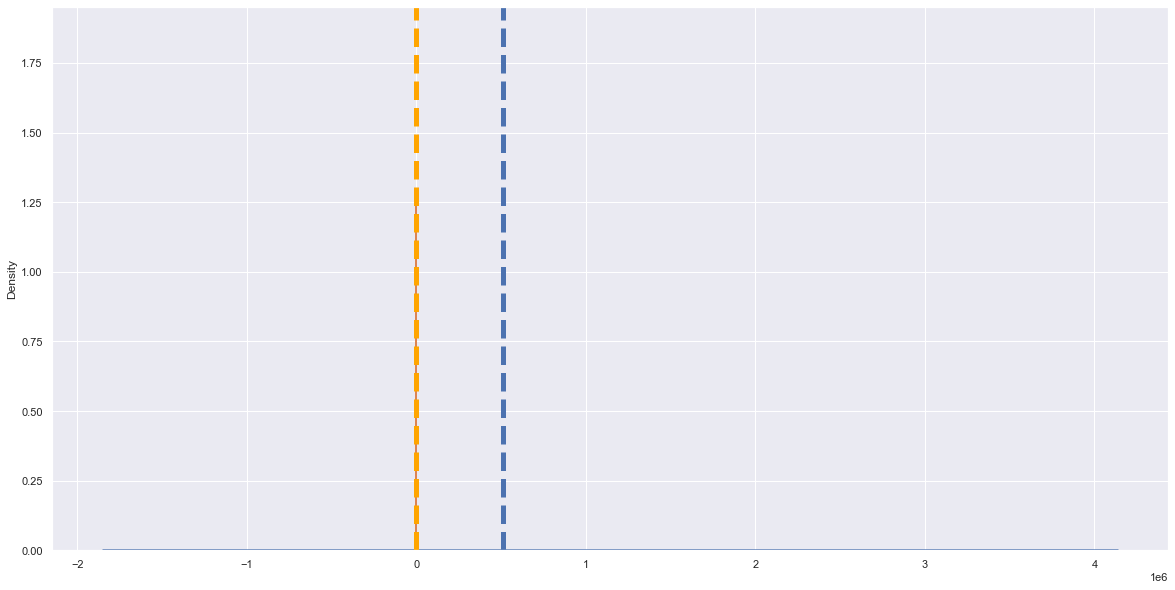

In [106]:
# set parameters for the chart
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

# customize the way the chart will look like
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

# plot the 2 distributions
plot_distribution(group1)
plot_distribution(group2)

# visualize the 2 charts as 1 
plt.figure()
ax1 = sns.distplot(group1)
ax2 = sns.distplot(group2)
plt.axvline(np.mean(group1), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(group2), color='orange', linestyle='dashed', linewidth=5)




## Analyzing the Results

Because the p-value of our test (0.21) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test. The results are similar to random sampling, and our hypothesis that "If a country is more developed, then it would have a higher rate of all lung cancers." is unlikely to be true. We must also remember that p-values cannot prove anything, they just tell us the likelihood that the results are due to chance.